In [1]:
import pandas as pd
import matplotlib.pylab as plt
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
complaints = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
complaints.head()

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7,11,12,13,14,20,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32774226,02/25/2016 03:29:51 PM,08/28/2016 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Posted Notice Or Order Removed/Tampered With,NaN,11426.0,248-17 89 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.726934,-73.717922,"(40.726933779590944, -73.71792231541113)"
1,33450845,05/26/2016 11:46:58 AM,09/29/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11414.0,156-30 77 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661394,-73.856045,"(40.661394379534805, -73.85604520872663)"
2,34441542,09/30/2016 05:01:06 PM,11/04/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,10467.0,2910 BARNS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.868126,-73.863425,"(40.86812648956945, -73.86342540063484)"
3,30279915,03/28/2015 04:30:52 PM,08/08/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11361.0,40-20 215 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764384,-73.768646,"(40.764383824168, -73.76864600551563)"
4,33496450,06/02/2016 07:04:01 PM,10/05/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,11226.0,21 SAINT PAULS COURT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.650848,-73.961919,"(40.65084761466193, -73.96191869666997)"


In [3]:
print(len(complaints))

628589


In [4]:
complaints.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                        10312
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             1
Location Type                     600426
Incident Zip                       13434
Incident Address                      99
Street Name                           99
Cross Street 1                    162002
Cross Street 2                    162109
Intersection Street 1             628588
Intersection Street 2             628588
Address Type                        8321
City                               13302
Landmark                          628589
Facility Type                     628589
Status                                39
Due Date                          600279
Resolution Description               278
Resolution Action Updated Date      8322
Community Board                        0
Borough         

In [5]:
complaints = complaints.drop(['Location Type', 'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type', 'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'School Name', 'School Number', 'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'Park Facility Name', 'Park Borough'], axis=1)

In [6]:
dates = [elem for elem in complaints['Created Date']]

In [7]:
formatteddates = []
for i in range(0,len(dates)):
    formatteddates.append(dates[i][:-3])

In [8]:
complaints['Date Index'] = formatteddates

In [9]:
complaints['Date Index'] = pd.to_datetime(complaints['Date Index'], format = "%m/%d/%Y %H:%M:%S")
#pd.to_datetime(citi_df['starttime'], format="%m/%d/%Y %H:%M:%S")

In [10]:
complaints.index = complaints['Date Index']

In [11]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,Date Index
Date Index,,,,,,,,,,,,,,,,,,,,,
2016-02-25 03:29:51,32774226,02/25/2016 03:29:51 PM,08/28/2016 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Posted Notice Or Order Removed/Tampered With,11426.0,248-17 89 AVENUE,89 AVENUE,...,The Department of Buildings attempted to inves...,08/28/2016 12:00:00 AM,13 QUEENS,QUEENS,1062433.0,204244.0,40.726934,-73.717922,"(40.726933779590944, -73.71792231541113)",2016-02-25 03:29:51
2016-05-26 11:46:58,33450845,05/26/2016 11:46:58 AM,09/29/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,11414.0,156-30 77 STREET,77 STREET,...,The Department of Buildings attempted to inves...,09/29/2016 12:00:00 AM,10 QUEENS,QUEENS,1024189.0,180273.0,40.661394,-73.856045,"(40.661394379534805, -73.85604520872663)",2016-05-26 11:46:58
2016-09-30 05:01:06,34441542,09/30/2016 05:01:06 PM,11/04/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,10467.0,2910 BARNS AVENUE,BARNS AVENUE,...,The Department of Buildings investigated this ...,11/04/2016 12:00:00 AM,11 BRONX,BRONX,1022024.0,255589.0,40.868126,-73.863425,"(40.86812648956945, -73.86342540063484)",2016-09-30 05:01:06
2015-03-28 04:30:52,30279915,03/28/2015 04:30:52 PM,08/08/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,11361.0,40-20 215 STREET,215 STREET,...,The Department of Buildings investigated this ...,08/08/2016 12:00:00 AM,11 QUEENS,QUEENS,1048338.0,217847.0,40.764384,-73.768646,"(40.764383824168, -73.76864600551563)",2015-03-28 04:30:52
2016-06-02 07:04:01,33496450,06/02/2016 07:04:01 PM,10/05/2016 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,11226.0,21 SAINT PAULS COURT,SAINT PAULS COURT,...,The Department of Buildings determined that th...,10/05/2016 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,994817.0,176400.0,40.650848,-73.961919,"(40.65084761466193, -73.96191869666997)",2016-06-02 07:04:01


In [12]:
complaints.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                        10312
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             1
Incident Zip                       13434
Incident Address                      99
Street Name                           99
Cross Street 1                    162002
Cross Street 2                    162109
Address Type                        8321
City                               13302
Status                                39
Due Date                          600279
Resolution Description               278
Resolution Action Updated Date      8322
Community Board                        0
Borough                                0
X Coordinate (State Plane)         13430
Y Coordinate (State Plane)         13430
Latitude                           13430
Longitude                          13430
Location        

In [13]:
uniquevals = complaints.iloc[:,:1]
monthlycountc = uniquevals.resample('M').count()
monthlycountc = monthlycountc.sort(['Unique Key'], ascending=False)
monthlycountc.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Unique Key
Date Index,
2010-03-31,11064
2010-04-30,10654
2010-08-31,10468
2010-05-31,10243
2010-09-30,9956
2010-06-30,9910
2010-07-31,9795
2014-03-31,9255
2010-01-31,9190


In [55]:
monthlycountc.describe()

,Unique Key
count,83.000000
mean,7573.361446
std,1190.803547
min,5382.000000
25%,6928.500000
50%,7368.000000
75%,8119.500000
max,11064.000000


In [14]:
annualcount = uniquevals.resample('A').count()
annualcount = annualcount.sort_index(ascending=False)
annualcount

,Unique Key
Date Index,
2016-12-31,80859
2015-12-31,88594
2014-12-31,89646
2013-12-31,84302
2012-12-31,88435
2011-12-31,85208
2010-12-31,111545


In [52]:
boro = complaints['Unique Key'].groupby(complaints['Borough']).count()

In [53]:
boro = pd.DataFrame(boro)
boro

,Unique Key
Borough,
BRONX,80804
BROOKLYN,184022
MANHATTAN,117692
QUEENS,214952
STATEN ISLAND,31118
Unspecified,1


In [54]:
boro.describe()

,Unique Key
count,6.000000
mean,104764.833333
std,84336.777473
min,1.000000
25%,43539.500000
50%,99248.000000
75%,167439.500000
max,214952.000000


In [17]:
zipcode = complaints['Unique Key'].groupby(complaints['Incident Zip']).count()

In [18]:
zipcode = pd.DataFrame(zipcode)
zipcode = zipcode.sort(['Unique Key'], ascending=False)
zipcode.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Unique Key
Incident Zip,
11419.0,17361
11355.0,8960
11208.0,8046
11221.0,7935
11235.0,7315
11226.0,7173
11211.0,7092
11220.0,7032
11207.0,7005


In [50]:
zipcode.describe()

,Unique Key
count,202.000000
mean,3045.321782
std,2247.986701
min,1.000000
25%,1381.000000
50%,3062.000000
75%,4356.250000
max,17361.000000


In [19]:
violations = pd.read_csv('DOB_Violations.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,3,5,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
violations.head()

,ISN_DOB_BIS_VIOL,BORO,BIN,BLOCK,LOT,ISSUE_DATE,VIOLATION_TYPE_CODE,VIOLATION_NUMBER,HOUSE_NUMBER,STREET,DISPOSITION_DATE,DISPOSITION_COMMENTS,DEVICE_NUMBER,DESCRIPTION,ECB_NUMBER,NUMBER,VIOLATION_CATEGORY,VIOLATION_TYPE
0,1853880,4,4314540.0,01863,07502,20140515,LBLVIO,19551,48-21,92 STREET,2.01605e+07,"CIAKMH DISMISSED, INV #61675679",00067775,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,NaN,V*051514LBLVIO19551,V*-DOB VIOLATION - DISMISSED,LBLVIO-LOW PRESSURE BOILER
1,2009641,5,5121944.0,04441,00001,20151001,LBLVIO,14723,303,CENTER STREET,2.01605e+07,"CIAKMH CANCELLED, CITY OWNED PROPERTY CURRENT ...",00076420,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,NaN,V*100115LBLVIO14723,V*-DOB VIOLATION - DISMISSED,LBLVIO-LOW PRESSURE BOILER
2,142871,3,3117400.0,05111,00024,19920407,LL1081,02749,2820,SNYDER AVENUE,2.01605e+07,JMA CAT 5 PERFORMED 5-14-15,E9202749,1,NaN,V*040792LL108102749,V*-DOB VIOLATION - DISMISSED,LL1081-LOCAL LAW 10/81 - ELEVATOR
3,1311958,5,5121944.0,04441,00001,20080103,LL6291,26494,276,CENTER STREET,2.01605e+07,"CIAKMH CANCELLED, CITY OWNED PROPERTY CURRENT ...",00076420,NaN,NaN,V*010308LL629126494,V*-DOB VIOLATION - DISMISSED,LL6291-LOCAL LAW 62/91 - BOILERS
4,348436,4,4054168.0,02344,00030,19950417,LL1081,03715,59-06,LAUREL HILL BOULEVARD,2.01605e+07,JMA 2015 SAT CAT 1 PERFORMED 3-4-15,E9503715,NaN,NaN,V*041795LL108103715,V*-DOB VIOLATION - DISMISSED,LL1081-LOCAL LAW 10/81 - ELEVATOR


In [21]:
print(len(violations))

1822219


In [22]:
violations.isnull().sum()

ISN_DOB_BIS_VIOL              0
BORO                          0
BIN                        3326
BLOCK                     12773
LOT                       12051
ISSUE_DATE                    1
VIOLATION_TYPE_CODE           0
VIOLATION_NUMBER              9
HOUSE_NUMBER                371
STREET                    17400
DISPOSITION_DATE         526000
DISPOSITION_COMMENTS     565806
DEVICE_NUMBER            421059
DESCRIPTION             1412393
ECB_NUMBER              1712470
NUMBER                       46
VIOLATION_CATEGORY         3083
VIOLATION_TYPE             5066
dtype: int64

In [23]:
#index 648912 is NaN value for 'ISSUE_DATE'

In [24]:
violations = violations.drop(['ECB_NUMBER'], axis=1)

In [25]:
violations.isnull().sum()

ISN_DOB_BIS_VIOL              0
BORO                          0
BIN                        3326
BLOCK                     12773
LOT                       12051
ISSUE_DATE                    1
VIOLATION_TYPE_CODE           0
VIOLATION_NUMBER              9
HOUSE_NUMBER                371
STREET                    17400
DISPOSITION_DATE         526000
DISPOSITION_COMMENTS     565806
DEVICE_NUMBER            421059
DESCRIPTION             1412393
NUMBER                       46
VIOLATION_CATEGORY         3083
VIOLATION_TYPE             5066
dtype: int64

In [26]:
dates = [elem for elem in violations['ISSUE_DATE']]

In [27]:
print(len(dates))

1822219


In [28]:
t = dates[:500000]
z = []
for i in range(0,len(t)):
    z.append(pd.to_datetime(str(t[i]), format='%Y%m%d', errors='coerce'))

In [29]:
print(z[499999])

1989-07-17 00:00:00


In [30]:
t = dates[500000:1000000]
y = []
for i in range(0,len(t)):
    y.append(pd.to_datetime(str(t[i]), format='%Y%m%d', errors='coerce'))

In [31]:
t = dates[1000000:1500000]
x = []
for i in range(0,len(t)):
    x.append(pd.to_datetime(str(t[i]), format='%Y%m%d', errors='coerce'))

In [32]:
t = dates[1500000:1822219]
w = []
for i in range(0,len(t)):
    w.append(pd.to_datetime(str(t[i]), format='%Y%m%d', errors='coerce'))

In [33]:
a = z + y + x + w

In [34]:
violations['Date Index'] = a

In [35]:
print(len(list(violations['ISN_DOB_BIS_VIOL'].unique())))

1822219


In [36]:
violations.head()

,ISN_DOB_BIS_VIOL,BORO,BIN,BLOCK,LOT,ISSUE_DATE,VIOLATION_TYPE_CODE,VIOLATION_NUMBER,HOUSE_NUMBER,STREET,DISPOSITION_DATE,DISPOSITION_COMMENTS,DEVICE_NUMBER,DESCRIPTION,NUMBER,VIOLATION_CATEGORY,VIOLATION_TYPE,Date Index
0,1853880,4,4314540.0,01863,07502,20140515,LBLVIO,19551,48-21,92 STREET,2.01605e+07,"CIAKMH DISMISSED, INV #61675679",00067775,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,V*051514LBLVIO19551,V*-DOB VIOLATION - DISMISSED,LBLVIO-LOW PRESSURE BOILER,2014-05-15
1,2009641,5,5121944.0,04441,00001,20151001,LBLVIO,14723,303,CENTER STREET,2.01605e+07,"CIAKMH CANCELLED, CITY OWNED PROPERTY CURRENT ...",00076420,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,V*100115LBLVIO14723,V*-DOB VIOLATION - DISMISSED,LBLVIO-LOW PRESSURE BOILER,2015-10-01
2,142871,3,3117400.0,05111,00024,19920407,LL1081,02749,2820,SNYDER AVENUE,2.01605e+07,JMA CAT 5 PERFORMED 5-14-15,E9202749,1,V*040792LL108102749,V*-DOB VIOLATION - DISMISSED,LL1081-LOCAL LAW 10/81 - ELEVATOR,1992-04-07
3,1311958,5,5121944.0,04441,00001,20080103,LL6291,26494,276,CENTER STREET,2.01605e+07,"CIAKMH CANCELLED, CITY OWNED PROPERTY CURRENT ...",00076420,NaN,V*010308LL629126494,V*-DOB VIOLATION - DISMISSED,LL6291-LOCAL LAW 62/91 - BOILERS,2008-01-03
4,348436,4,4054168.0,02344,00030,19950417,LL1081,03715,59-06,LAUREL HILL BOULEVARD,2.01605e+07,JMA 2015 SAT CAT 1 PERFORMED 3-4-15,E9503715,NaN,V*041795LL108103715,V*-DOB VIOLATION - DISMISSED,LL1081-LOCAL LAW 10/81 - ELEVATOR,1995-04-17


In [37]:
violations.index = violations['Date Index']

In [38]:
uniquevals = violations.iloc[:,:1]
monthlycountv = uniquevals.resample('M').count()
monthlycountv = monthlycountv.sort(['ISN_DOB_BIS_VIOL'], ascending=False)
monthlycountv.head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,ISN_DOB_BIS_VIOL
Date Index,
1995-08-31,46768
2014-05-31,39391
1997-09-30,36445
1998-05-31,36250
2003-03-31,35965
2002-03-31,34710
2001-02-28,34178
2000-02-29,33886
2011-12-31,33709


In [39]:
annualcount = uniquevals.resample('A').count()
annualcount = annualcount.sort_index(ascending=False)
annualcount.head(10)

,ISN_DOB_BIS_VIOL
Date Index,
2016-12-31,67700
2015-12-31,86320
2014-12-31,101619
2013-12-31,75586
2012-12-31,63483
2011-12-31,88821
2010-12-31,61583
2009-12-31,96585
2008-12-31,95354


In [40]:
violations['BORO'] = violations['BORO'].astype(str)
boro = violations['ISN_DOB_BIS_VIOL'].groupby(violations['BORO']).count()

In [41]:
boro = pd.DataFrame(boro)
boro

,ISN_DOB_BIS_VIOL
BORO,
0,3
1,711672
2,206320
3,534112
4,319364
5,50745
`,3


In [42]:
monthlies = pd.merge(monthlycountc, monthlycountv, right_index=True, left_index=True)

In [43]:
mcc = np.asarray((monthlies['Unique Key'].astype(float)))
mcv = np.asarray(monthlies['ISN_DOB_BIS_VIOL'])
mvc = np.divide(mcv, mcc)
print(mvc)

[ 5.30161507  4.75243198  3.4163032   3.41108007  2.3812492   2.89664296
  1.45121556  1.47512507  1.14357572  1.3213335   1.14443319  1.25839253
  1.16019628  0.87742514  1.06217687  1.24957813  0.75779524  1.06744307
  0.85032204  0.70880196  0.69022393  0.79977582  0.65959476  0.82872844
  0.72654155  0.67955946  0.74754619  0.63256681  0.51822358  0.58575291
  0.50030133  0.72800587  0.49909183  0.68426888  0.60730987  0.46123522
  0.71075222  0.70537136  0.46188384  0.66024327  0.60420867  0.66142718
  0.64332248  0.60061444  0.61290323  0.53948002  0.55146062  0.73214286
  0.61128049  0.63603578  0.57258804  0.42155618  0.61798881  0.48580297
  0.38051338  0.56934803  0.57536714  0.76283709  0.6638669   0.61687038
  0.53378106  0.59053343  0.68590416  0.51446308  0.51420642  0.51667336
  0.5172274   0.46989739  0.54083665  0.47512973  0.58390548  0.55963874
  0.51101512  0.57029863  0.48586012  0.48311327  0.48682148  0.43343291
  0.41700405  0.60312152  0.48734177  0.2921654   0

In [44]:
monthlies['Proportion V/C'] = mvc

In [45]:
monthlies = monthlies.rename(columns={'Unique Key':'Count of Complaints'})
monthlies = monthlies.rename(columns={'ISN_DOB_BIS_VIOL':'Count of Violations'})
monthlies = monthlies.sort_index(ascending=False)

In [46]:
monthlies = monthlies.sort_index(ascending=False)

In [47]:
monthlies

,Count of Complaints,Count of Violations,Proportion V/C
Date Index,,,
2016-11-30,6047,17516,2.896643
2016-10-31,7699,3337,0.433433
2016-09-30,7571,3895,0.514463
2016-08-31,8507,4983,0.585753
2016-07-31,8089,3801,0.469897
2016-06-30,7889,10424,1.321334
2016-05-31,7639,4374,0.572588
2016-04-30,7216,4411,0.611280
2016-03-31,7460,5420,0.726542


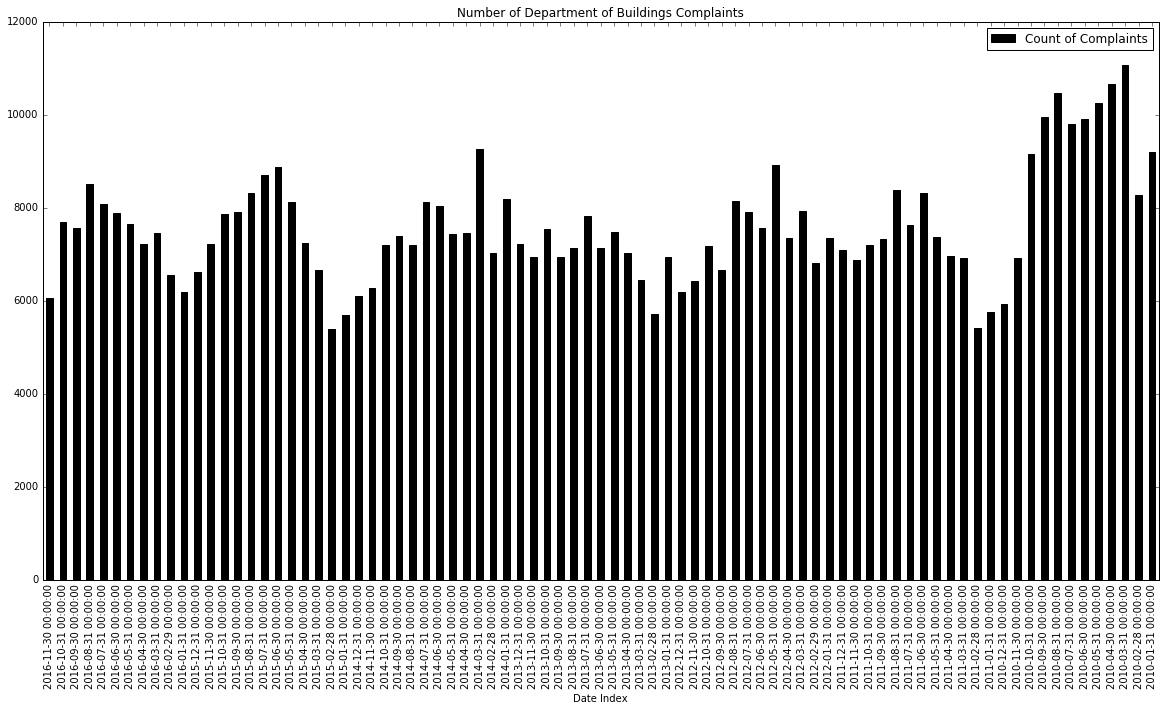

In [49]:
monthlies.plot(y='Count of Complaints', figsize=(20,10), kind='bar', title='Number of Department of Buildings Complaints', color='k')